**20L-0961 Lab 2 FBDA**

Task A:
1. Read the data provided
2. Plot a bar graph
3. Plot a line graph
4. Plot a pie chart
5. Scatter Plot


In [53]:
datafile = 'na-nov2021-agriculture-csv.csv'
# read the data from the file
import pandas as pd # we have categorical data as well
import matplotlib.pyplot as plt # for plotting with df.plot()
data = pd.read_csv(datafile)


data.head()
print(data.describe())

            Period    Data_value  MAGNTUDE  Series_title_3  Series_title_4  \
count   420.000000    420.000000     420.0             0.0             0.0   
mean   2013.530000   2376.026190       6.0             NaN             NaN   
std       4.035936   4840.409542       0.0             NaN             NaN   
min    2007.030000   -244.000000       6.0             NaN             NaN   
25%    2010.030000    221.000000       6.0             NaN             NaN   
50%    2013.530000    715.500000       6.0             NaN             NaN   
75%    2017.030000   2108.250000       6.0             NaN             NaN   
max    2020.030000  30370.000000       6.0             NaN             NaN   

       Series_title_5  
count             0.0  
mean              NaN  
std               NaN  
min               NaN  
25%               NaN  
50%               NaN  
75%               NaN  
max               NaN  


In [54]:
data.drop(['MAGNTUDE', 'Subject', 'Group', 'Series_title_1', 'Series_title_3','Series_title_4', 'Series_title_5'], axis=1, inplace=True)
# remove negatives from Data_value
data = data[data['Data_value'] > 0]
data['Period'] = pd.to_datetime(data['Period'], format='%Y')
data.head()

,Series_reference,Period,Data_value,STATUS,UNITS,Series_title_2
0,SNEA.SG01NAC16P10A11,2007-01-01,526,FINAL,Dollar,Wool
1,SNEA.SG01NAC16P10A11,2008-01-01,482,FINAL,Dollar,Wool
2,SNEA.SG01NAC16P10A11,2009-01-01,404,FINAL,Dollar,Wool
3,SNEA.SG01NAC16P10A11,2010-01-01,450,FINAL,Dollar,Wool
4,SNEA.SG01NAC16P10A11,2011-01-01,563,FINAL,Dollar,Wool


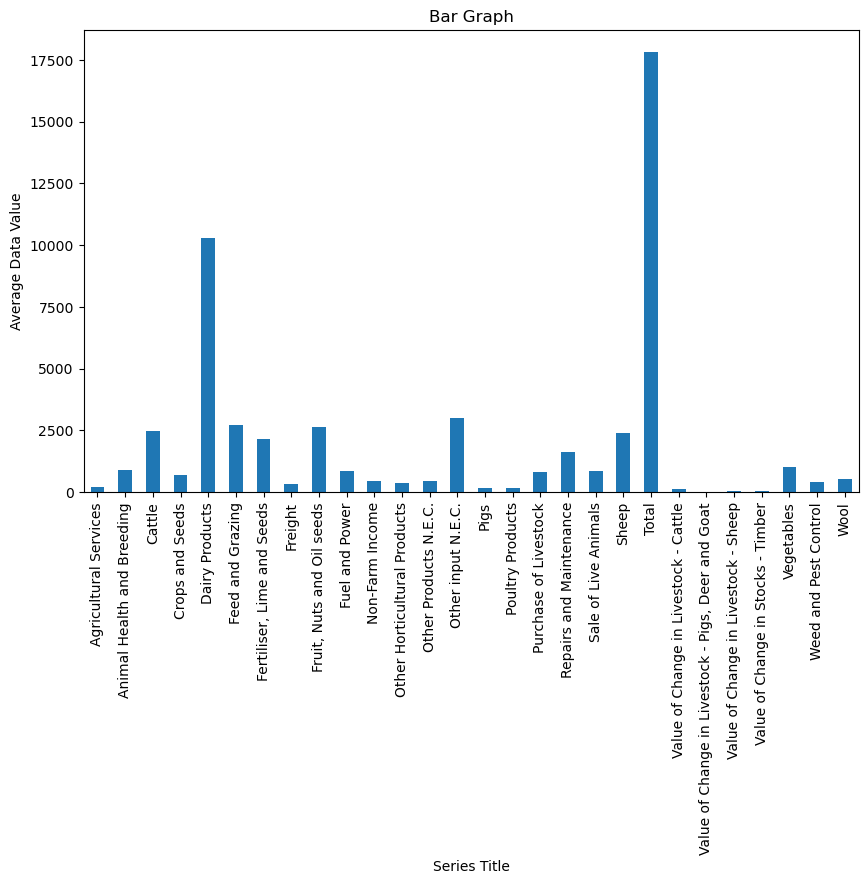

In [42]:
# Plot a bar graph
plt.figure(figsize=(10, 6))
data.groupby('Series_title_2')['Data_value'].mean().plot(kind='bar')
plt.title('Bar Graph')
plt.xlabel('Series Title')
plt.ylabel('Average Data Value')
plt.show()

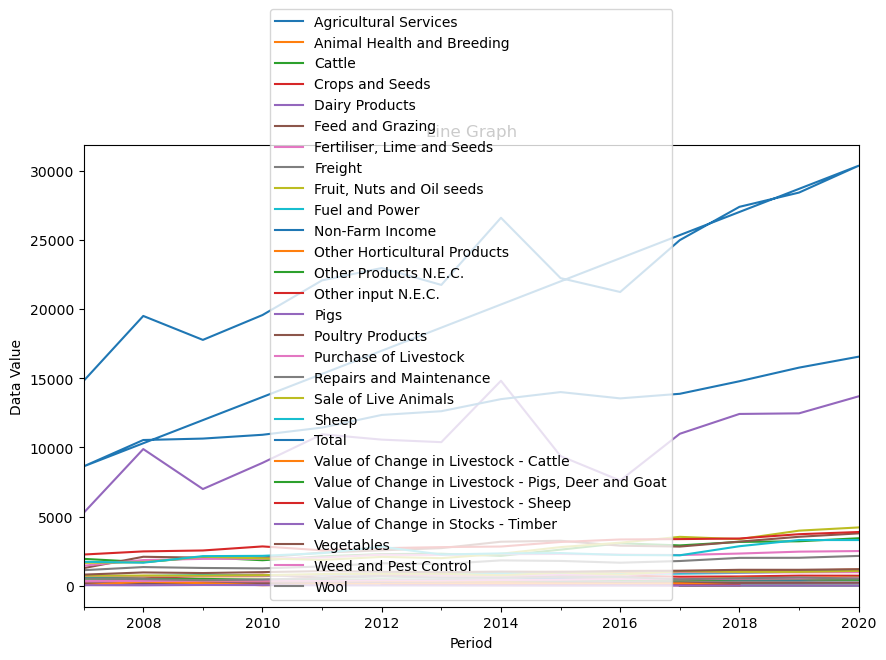

In [43]:
# plot line
# Plot a line graph
plt.figure(figsize=(10, 6))
for title, group in data.groupby('Series_title_2'):
    group.plot(x='Period', y='Data_value', label=title, ax=plt.gca())
plt.title('Line Graph')
plt.xlabel('Period')
plt.ylabel('Data Value')
plt.legend()
plt.show()

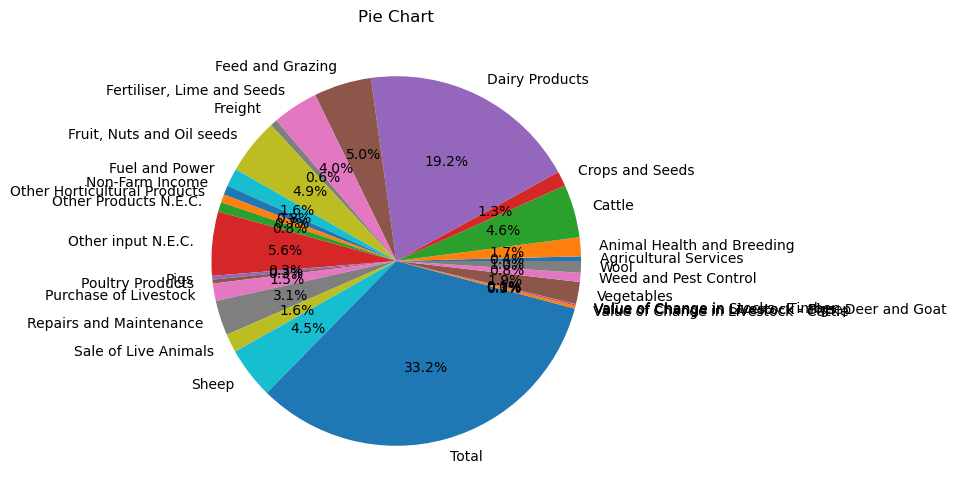

In [44]:
# Filter out negative values
filtered_data = data[data['Data_value'] >= 0]

# Plot the pie chart
plt.figure(figsize=(10, 6))
filtered_data.groupby('Series_title_2')['Data_value'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart')
plt.ylabel('')
plt.show()


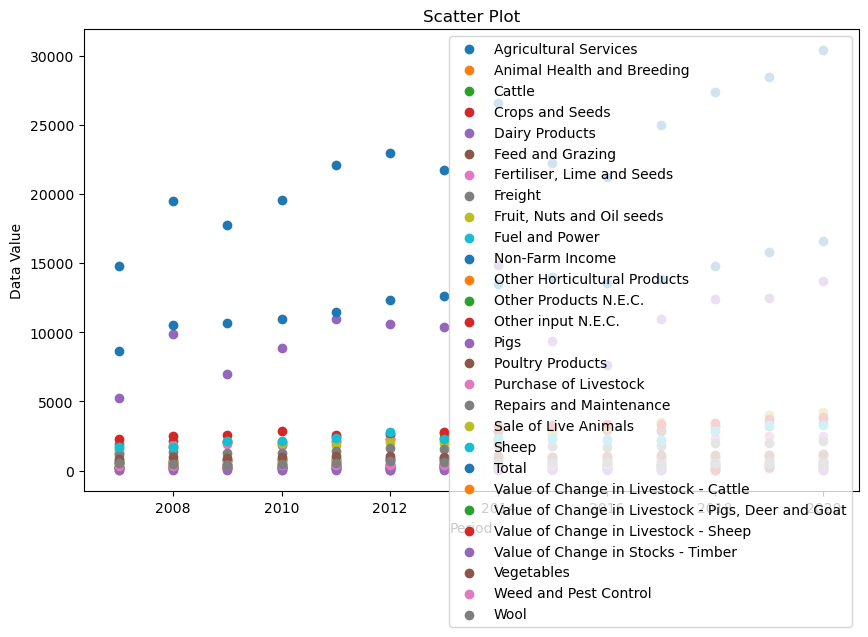

In [45]:
# plot scatter
plt.figure(figsize=(10, 6))
for title, group in data.groupby('Series_title_2'):
    plt.scatter(group['Period'], group['Data_value'], label=title)
plt.title('Scatter Plot')
plt.xlabel('Period')
plt.ylabel('Data Value')
plt.legend()
plt.show()


Task B:
1. Write a csv file, having the following columns:

Name of student
Age of Student
Height of student in inches
Gpa of student

2. Plot bar and line graph respectively for age, height and gpa.


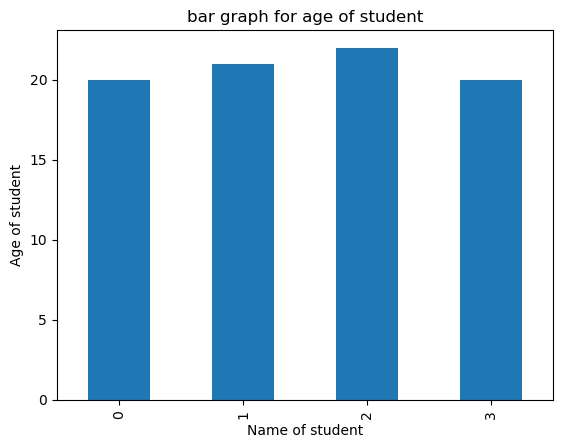

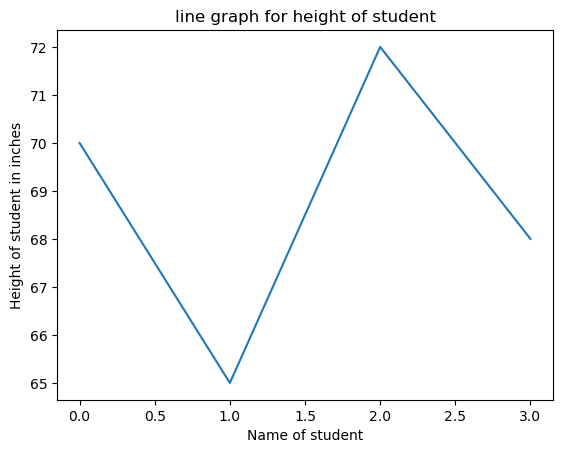

In [46]:
# csv file having following data
# Name of student, Age of student, Height of student in inches, Gpa of student
data_list=[['Name of student', 'Age of student', 'Height of student in inches', 'Gpa of student'],
           ['John', 20, 70, 3.5],
           ['Sara', 21, 65, 3.7],
           ['Jack', 22, 72, 3.8],
           ['Jill', 20, 68, 3.6]]
import csv
with open ('students.csv','w') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerows(data_list)
    
# plot bar and line graph respectively for age, height and gpa

data = pd.read_csv('students.csv')
data['Age of student'].plot(kind='bar', xlabel='Name of student', ylabel='Age of student', title='bar graph for age of student')
plt.show()

data['Height of student in inches'].plot(kind='line', xlabel='Name of student', ylabel='Height of student in inches', title='line graph for height of student')
plt.show()


Task C:

1.Train knn model on given data set

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(datafile)
df.drop(['MAGNTUDE', 'Subject', 'Group', 'Series_title_1', 'Series_title_3','Series_title_4', 'Series_title_5'], axis=1, inplace=True)
df = df[df['Data_value'] > 0]
df['Period'] = pd.to_datetime(df['Period'], format='%Y')

X = df[['Data_value']]
y = df['Series_title_2']

le=LabelEncoder()
y=le.fit_transform(y)

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the kNN classifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model

acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(acc * 100))

Accuracy: 31.58%
